
## ЛР5. – Классификатор на базе многослойного персептрона.
Осуществить генерацию исходных данных, которые представляют собой двумерное признаковое пространство, сгруппированное в 6 или более областей, отнесенных не менее чем к 4 классам (Пример взаимного расположения представлен на рисунке 1). В каждой области содержится не менее 50 примеров, и данные распределены по нормальному закону распределения. 
Необходимо:
- Визуализировать сгенерированные данные на плоскости.
- Для  сгенерированного датасета осуществить построение классификатор на базе многослойного персептрона. 
- Обосновать выбор числа слоев и нейронов в каждом слое. 
- В процессе обучения визуализировать разделяющие поверхности промежуточного слоя. 
- В процессе обучения построить графики изменения среднеквадратических ошибок на обучающей и тестовой  выборках. Обосновать момент остановки процесса обучения.
- Оценить точность, полноту, F-меру. Построить матрицу ошибок.
- Предусмотреть дополнительную возможность ввода пользователем новых, не входящих в сгенерированный датасет данных. Визуализировать их совместно с обучающей выборкой и разделяющими поверхностями, осуществить их классификацию.  

Рисунок 1. Пример взаимного расположения 6 областей относящихся к 4 классам.
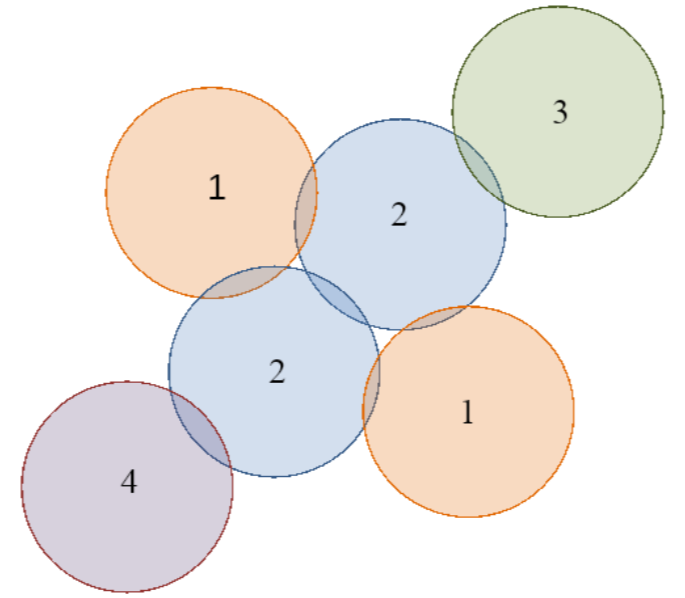


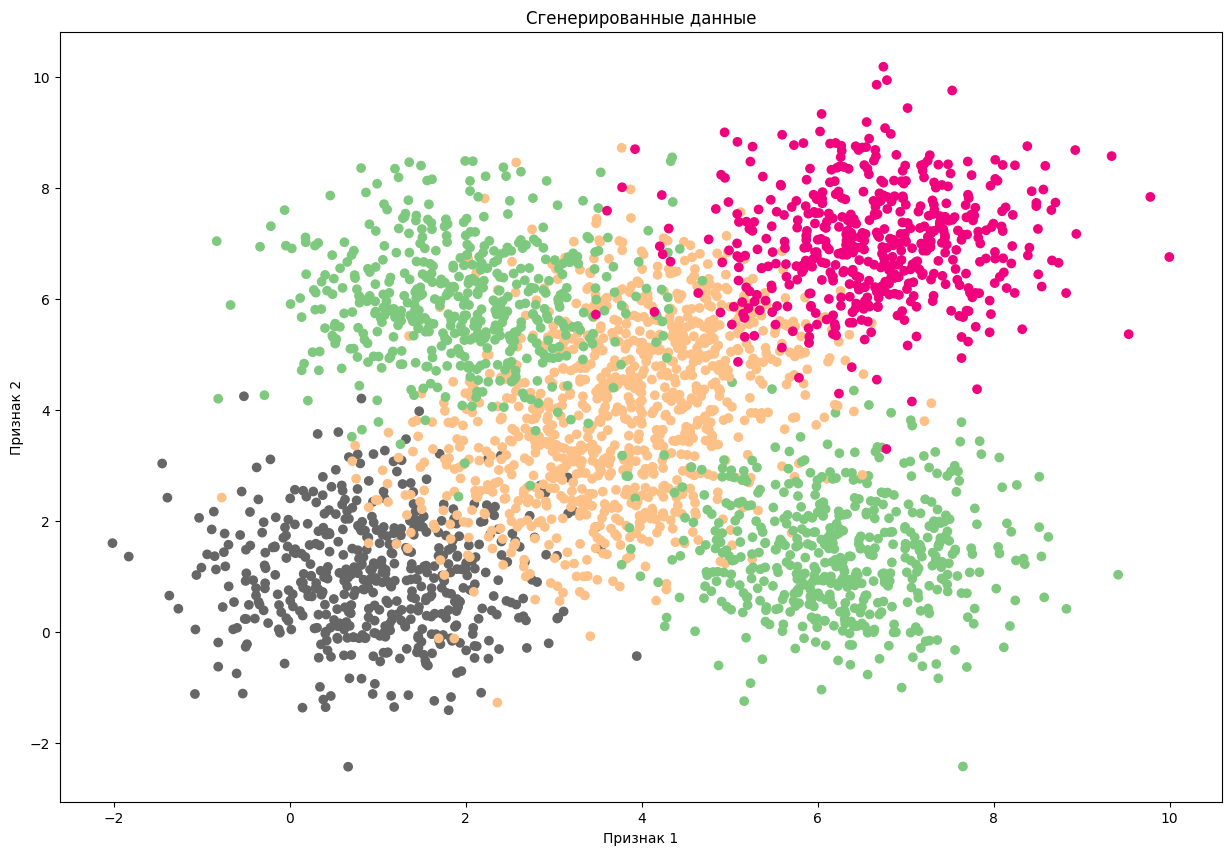

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры генерации данных
num_samples = 3000
num_classes = 4
num_clusters = 6

# Задаем центры кластеров
centers = np.array([[1, 1], # фиолетовый
                    [3.25, 2.85], #оранж 1
                    [6.3, 1.4], #зеленый 2
                    [4.25, 5.15], #оранж 2
                    [2, 6], #зеленый 1
                    [6.6, 7]])  #красный

# centers = np.random.rand(num_clusters, 2) * 10 - 5


# Генерируем данные с более похожим на нормальное распределение
data = []
labels = []
class_number = [3,1,0,1,0,2]

for _ in range(num_clusters):
    center = centers[_]
    class_label = class_number[_]
    cluster_data = np.random.multivariate_normal(center, np.eye(2), num_samples // num_clusters)
    data.extend(cluster_data)
    labels.extend([class_label] * (num_samples // num_clusters))

# for _ in range(num_clusters):
#     center = centers[_]
#     cov = np.random.rand(2, 2) * 0.5  # Матрица ковариации
#     cluster_data = np.random.multivariate_normal(center, cov, num_samples // num_clusters)
#     data.extend(cluster_data)
#     labels.extend([_] * (num_samples // num_clusters))
    
# Преобразуем в numpy массивы
data = np.array(data)
labels = np.array(labels)

# Визуализация данных с увеличенным размером графика
plt.figure(figsize=(15, 10))  # Задаем размеры фигуры (ширина, высота)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='Accent')
plt.title('Сгенерированные данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Epoch 1/30
75/75 - 1s - loss: 1.4718 - accuracy: 0.1900 - val_loss: 1.3958 - val_accuracy: 0.2000 - 979ms/epoch - 13ms/step
Epoch 2/30
75/75 - 0s - loss: 1.3573 - accuracy: 0.2512 - val_loss: 1.3194 - val_accuracy: 0.2800 - 142ms/epoch - 2ms/step
Epoch 3/30
75/75 - 0s - loss: 1.2665 - accuracy: 0.3787 - val_loss: 1.2201 - val_accuracy: 0.5033 - 116ms/epoch - 2ms/step
Epoch 4/30
75/75 - 0s - loss: 1.1732 - accuracy: 0.5188 - val_loss: 1.1366 - val_accuracy: 0.5217 - 125ms/epoch - 2ms/step
Epoch 5/30
75/75 - 0s - loss: 1.0926 - accuracy: 0.5433 - val_loss: 1.0568 - val_accuracy: 0.5950 - 126ms/epoch - 2ms/step
Epoch 6/30
75/75 - 0s - loss: 1.0216 - accuracy: 0.6125 - val_loss: 0.9845 - val_accuracy: 0.6400 - 120ms/epoch - 2ms/step
Epoch 7/30
75/75 - 0s - loss: 0.9465 - accuracy: 0.6658 - val_loss: 0.9098 - val_accuracy: 0.6867 - 130ms/epoch - 2ms/step
Epoch 8/30
75/75 - 0s - loss: 0.8786 - accuracy: 0.7013 - val_loss: 0.8487 - val_accuracy: 0.7200 - 124ms/epoch - 2ms/step
Epoch 9/30
75/7

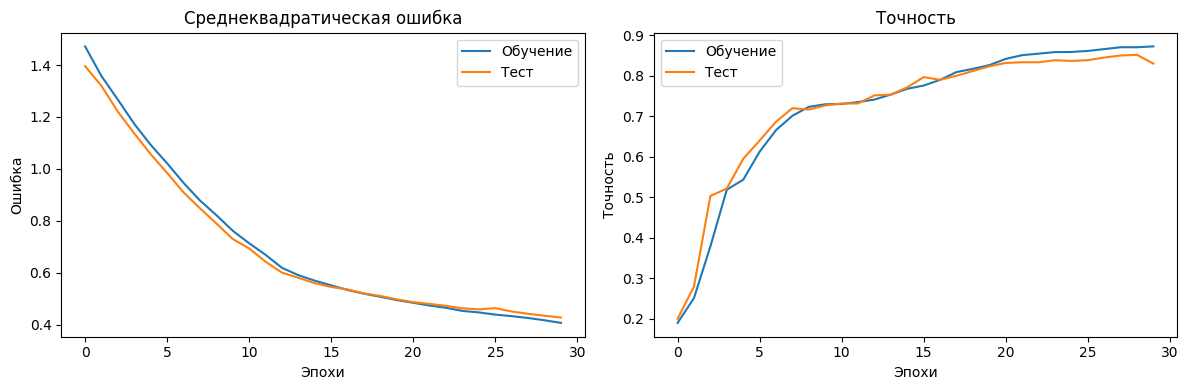

0.8516666889190674


In [68]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Создание модели многослойного персептрона
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Входной слой с размерностью признаков
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Выходной слой с числом нейронов, равным числу классов, и softmax
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Так как у нас целые числа меток (нечисловые)
              metrics=['accuracy'])

# Обучение модели
history = model.fit(train_data, train_labels, epochs=30, validation_data=(test_data, test_labels), verbose=2)

# Графики изменения среднеквадратических ошибок на обучающей и тестовой выборках
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Тест')
plt.title('Среднеквадратическая ошибка')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Обучение')
plt.plot(history.history['val_accuracy'], label='Тест')
plt.title('Точность')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

print(max(history.history['val_accuracy']))

Epoch 1/30
75/75 - 1s - loss: 1.0226 - accuracy: 0.5554 - val_loss: 0.8740 - val_accuracy: 0.6217 - 958ms/epoch - 13ms/step
Epoch 2/30
75/75 - 0s - loss: 0.7174 - accuracy: 0.6921 - val_loss: 0.6778 - val_accuracy: 0.7333 - 131ms/epoch - 2ms/step
Epoch 3/30
75/75 - 0s - loss: 0.5363 - accuracy: 0.8017 - val_loss: 0.4925 - val_accuracy: 0.8150 - 172ms/epoch - 2ms/step
Epoch 4/30
75/75 - 0s - loss: 0.4119 - accuracy: 0.8621 - val_loss: 0.4063 - val_accuracy: 0.8533 - 150ms/epoch - 2ms/step
Epoch 5/30
75/75 - 0s - loss: 0.3530 - accuracy: 0.8775 - val_loss: 0.3728 - val_accuracy: 0.8533 - 135ms/epoch - 2ms/step
Epoch 6/30
75/75 - 0s - loss: 0.3324 - accuracy: 0.8750 - val_loss: 0.3726 - val_accuracy: 0.8450 - 130ms/epoch - 2ms/step
Epoch 7/30
75/75 - 0s - loss: 0.3140 - accuracy: 0.8829 - val_loss: 0.3504 - val_accuracy: 0.8567 - 129ms/epoch - 2ms/step
Epoch 8/30
75/75 - 0s - loss: 0.3155 - accuracy: 0.8783 - val_loss: 0.3511 - val_accuracy: 0.8500 - 131ms/epoch - 2ms/step
Epoch 9/30
75/7

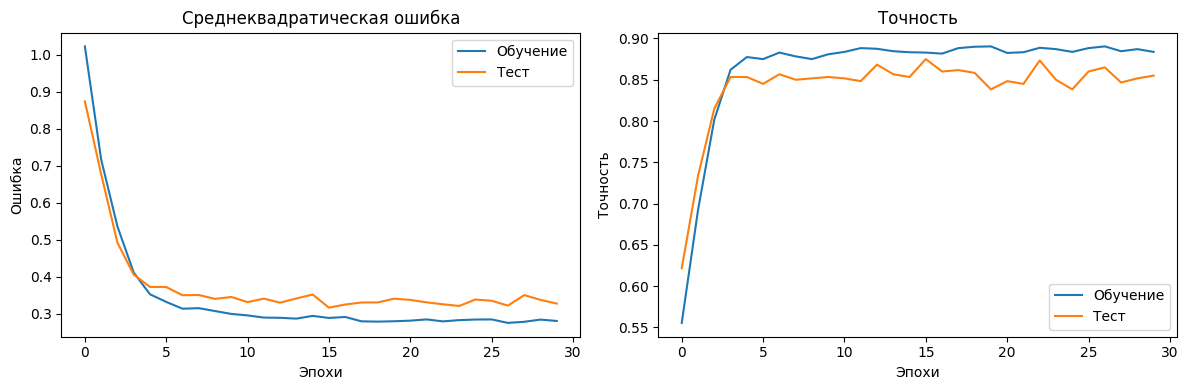

0.875


In [69]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Создание модели многослойного персептрона
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Входной слой с размерностью признаков
    tf.keras.layers.Dense(64, activation='relu'),  # Первый скрытый слой
    tf.keras.layers.Dense(64, activation='relu'),  # Первый скрытый слой
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Выходной слой с числом нейронов, равным числу классов, и softmax
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Так как у нас целые числа меток (нечисловые)
              metrics=['accuracy'])

# Обучение модели
history = model.fit(train_data, train_labels, epochs=30, validation_data=(test_data, test_labels), verbose=2)

# Графики изменения среднеквадратических ошибок на обучающей и тестовой выборках
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Тест')
plt.title('Среднеквадратическая ошибка')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Обучение')
plt.plot(history.history['val_accuracy'], label='Тест')
plt.title('Точность')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

print(max(history.history['val_accuracy']))

In [70]:
#30эпох

| Скрытых слоев | нейронов | точность |
|---------------|----------|----------
| 1             | 2        | 0.488    | 
| 1             | 4        | 0.871    | 
| 1             | 8        | 0.888    | 
| 1             | 16       | 0.888    | 
| 1             | 32       | 0.896    | 
| 1             | 64       | 0.896    | 
| 1             | 128      | 0.894    | |
| 2             | 4 4      | 0.741     |
| 2             | 64 64    | 0.903  
| 2             | 524 256  | 0.898    |
| 2             | 128 128  | 0.899    |
| 2             | 128 64   | 0.899    |
| 2             | 64 32    | 0.896    |  | .7.903

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

# Предсказание классов на тестовой выборке
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Построение матрицы ошибок
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Матрица ошибок:")
print(conf_matrix)

# Вывод отчета о классификации
class_names = [f'Class {i}' for i in range(num_classes)]
print("\nОтчет о классификации:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))


19/19 [==============================] - 0s 1ms/step
Матрица ошибок:
[[161  26   0   0]
 [ 24 164   1  11]
 [  2  10  83   0]
 [  2  11   0 105]]

Отчет о классификации:
              precision    recall  f1-score   support

     Class 0       0.85      0.86      0.86       187
     Class 1       0.78      0.82      0.80       200
     Class 2       0.99      0.87      0.93        95
     Class 3       0.91      0.89      0.90       118

    accuracy                           0.85       600
   macro avg       0.88      0.86      0.87       600
weighted avg       0.86      0.85      0.86       600



19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       187
           1       0.78      0.82      0.80       200
           2       0.99      0.87      0.93        95
           3       0.91      0.89      0.90       118

    accuracy                           0.85       600
   macro avg       0.88      0.86      0.87       600
weighted avg       0.86      0.85      0.86       600



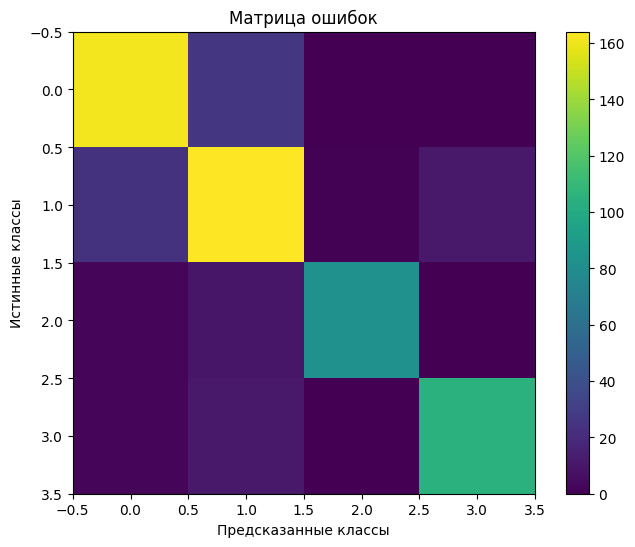

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

# Получение предсказаний модели на тестовой выборке
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)  # Получение предсказанных меток

# Вывод отчета о классификации
print(classification_report(test_labels, predicted_labels))

# Построение матрицы ошибок
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='None', cmap='viridis')
plt.title('Матрица ошибок')
plt.colorbar()
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()


1/1 [==============================] - 0s 23ms/step


C:\Users\AlexB\AppData\Local\Temp\ipykernel_6920\3101072688.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[labels == class_label, 0], data[labels == class_label, 1], color=class_colors[class_label], label=f'Класс {class_label + 1}', cmap='Accent')


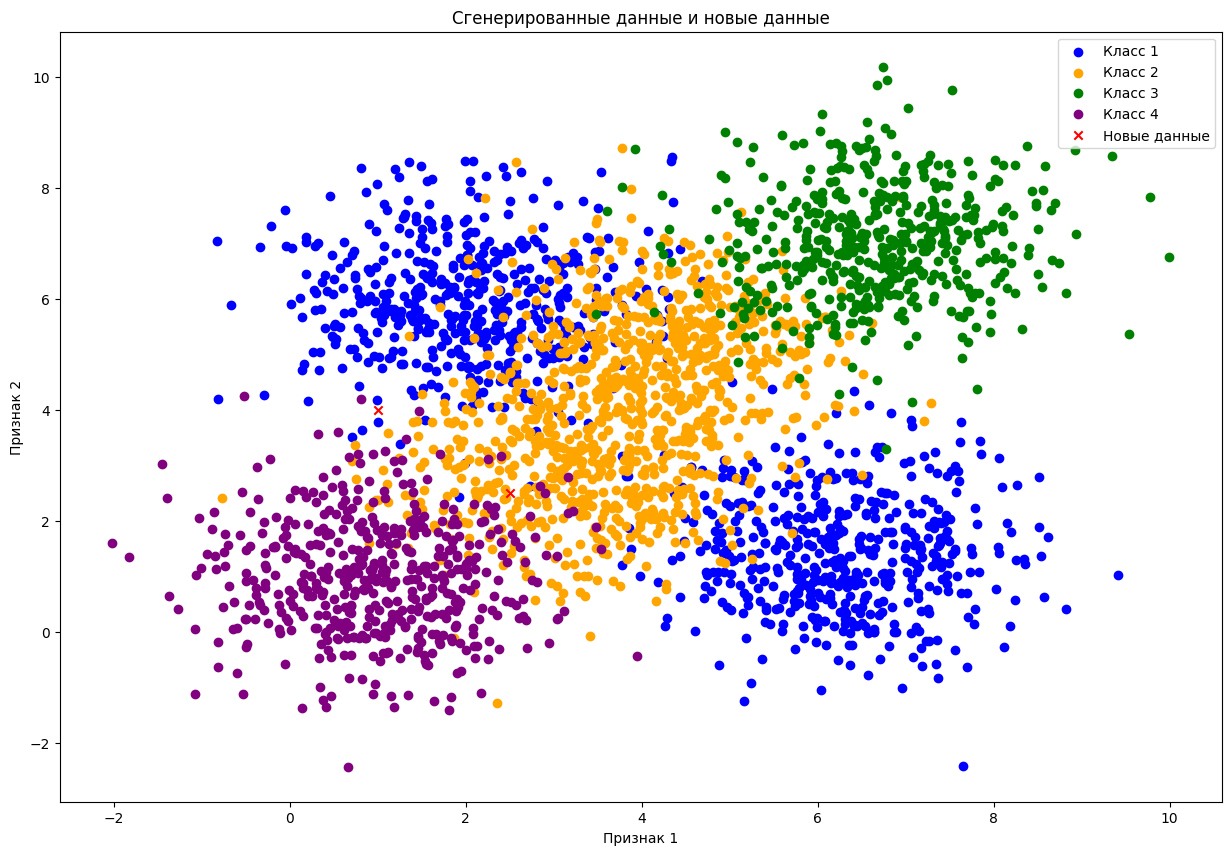

In [73]:
# Создание списка цветов для каждого класса
class_colors = ['blue', 'orange', 'green', 'purple']

# Предсказание класса для новых данных
new_data = np.array([[2.5, 2.5], [1, 4]])
new_predictions = model.predict(new_data)
new_predicted_labels = np.argmax(new_predictions, axis=1)


# Визуализация новых данных и разделяющих поверхностей с подписями классов
plt.figure(figsize=(15, 10))

# Визуализация сгенерированных данных
for class_label in range(num_classes):
    plt.scatter(data[labels == class_label, 0], data[labels == class_label, 1], color=class_colors[class_label], label=f'Класс {class_label + 1}', cmap='Accent')

# Визуализация новых данных
plt.scatter(new_data[:, 0], new_data[:, 1], c='red', marker='x', label='Новые данные')

plt.title('Сгенерированные данные и новые данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()


7813/7813 [==============================] - 7s 908us/step


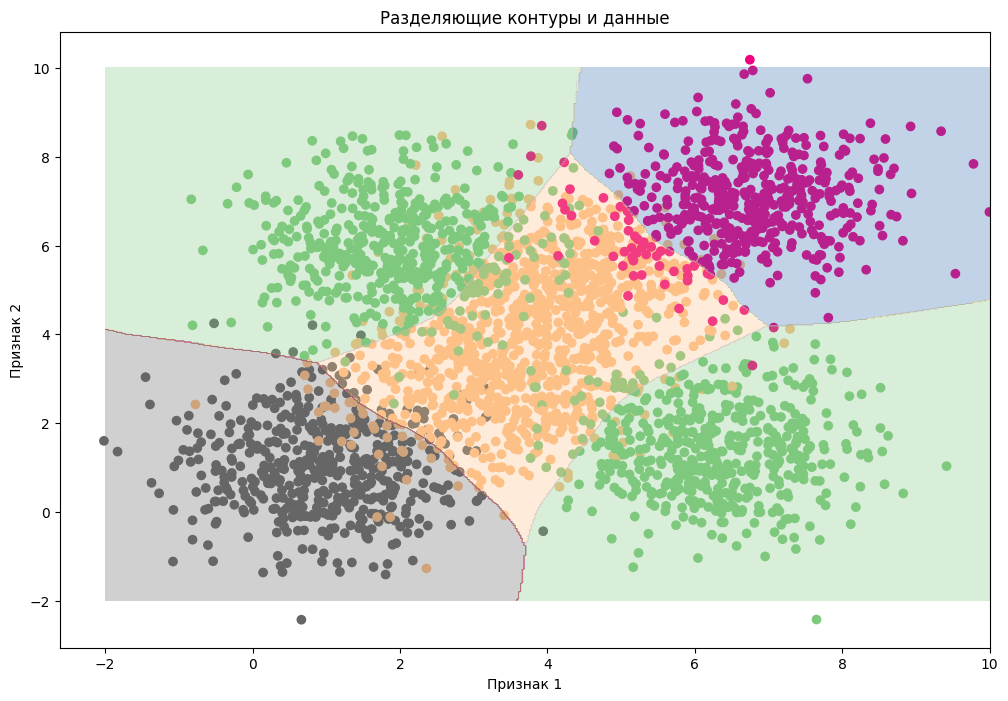

In [74]:
# Создание сетки точек для визуализации контуров
xx, yy = np.meshgrid(np.linspace(-2, 10, 500),
                     np.linspace(-2, 10, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Предсказание классов для каждой точки сетки
grid_predictions = model.predict(grid_points)
grid_classes = np.argmax(grid_predictions, axis=1)

# Визуализация данных и разделяющих контуров
plt.figure(figsize=(12, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='Accent')
plt.contourf(xx, yy, grid_classes.reshape(xx.shape), alpha=0.3, cmap='Accent')
plt.title('Разделяющие контуры и данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()


7813/7813 [==============================] - 10s 1ms/step


C:\Users\AlexB\AppData\Local\Temp\ipykernel_6920\1652834111.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(new_data[:, 0], new_data[:, 1], c=new_predicted_labels, marker='x', s=100, cmap='Set1', edgecolors='black', label='Новые данные')


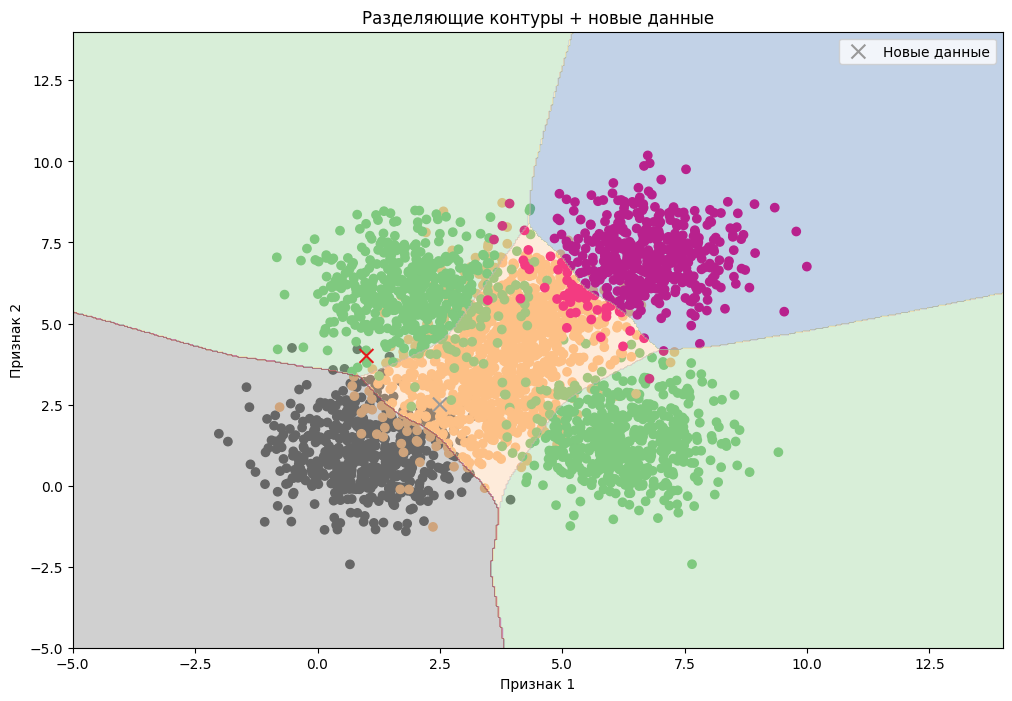

Предсказанные метки для новых данных: [1 0]


In [84]:
# Предсказание класса для новых данных
new_data = np.array([[2.5, 2.5], [1, 4]])
new_predictions = model.predict(new_data)
new_predicted_labels = np.argmax(new_predictions, axis=1)

# Создание сетки точек для визуализации контуров
xx, yy = np.meshgrid(np.linspace(-5, 14, 500),
                     np.linspace(-5, 14, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Предсказание классов для каждой точки сетки
grid_predictions = model.predict(grid_points)
grid_classes = np.argmax(grid_predictions, axis=1)

# Визуализация данных, контуров и новых данных
plt.figure(figsize=(12, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='Accent')
plt.contourf(xx, yy, grid_classes.reshape(xx.shape), alpha=0.3, cmap='Accent')
plt.scatter(new_data[:, 0], new_data[:, 1], c=new_predicted_labels, marker='x', s=100, cmap='Set1', edgecolors='black', label='Новые данные')
plt.title('Разделяющие контуры + новые данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

print("Предсказанные метки для новых данных:", new_predicted_labels)